# 1. Import and Read the Data
<a id="1"></a>

In [2]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import cross_val_predict, validation_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from xgboost import XGBClassifier

import optuna

from scipy.stats import kurtosis, skew

from time import time

from warnings import simplefilter
simplefilter("ignore")

pd.set_option('display.max_columns', None)

In [10]:
data = pd.read_csv(r"C:\Users\pc\Downloads\loan_data (1).csv")

data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [14]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [12]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 45000 rows and 14 columns.


In [8]:
print(f'The dataset has {data.isna().sum().sum()} null values.')

The dataset has 0 null values.


In [9]:
print(f'The dataset has {data.duplicated().sum()} duplicate values.')

The dataset has 0 duplicate values.


In [10]:
data.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

The columns data type are correct. This is their meaning:

* **person_age.** Age of the person.
* **person_gender.** Gender of the person.
* **person_education.** Highest education level.
* **person_income.** Annual income.
* **person_emp_exp.** Years of employment experience.
* **person_home_ownership.** Home ownership status (e.g., rent, own, mortgage).
* **loan_amnt.** Loan amount requested.
* **loan_intent.** Purpose of the loan.
* **loan_int_rate.** Loan interest rate.
* **loan_percent_income.** Loan amount as a percentage of annual income.
* **cb_person_cred_hist_length.** Length of credit history in years.
* **credit_score.**	Credit score of the person.
* **previous_loan_defaults_on_file.** Indicator of previous loan defaults.
* **loan_status (target variable).** Loan approval status: 1 = approved; 0 = rejected.

In [11]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


There could be inconsistencies in the data, like the maximum age of a person (144 years).

# 2. Exploratory Data Analysis
<a id="2"></a>

## 2.1 Overview

<Figure size 1200x600 with 0 Axes>

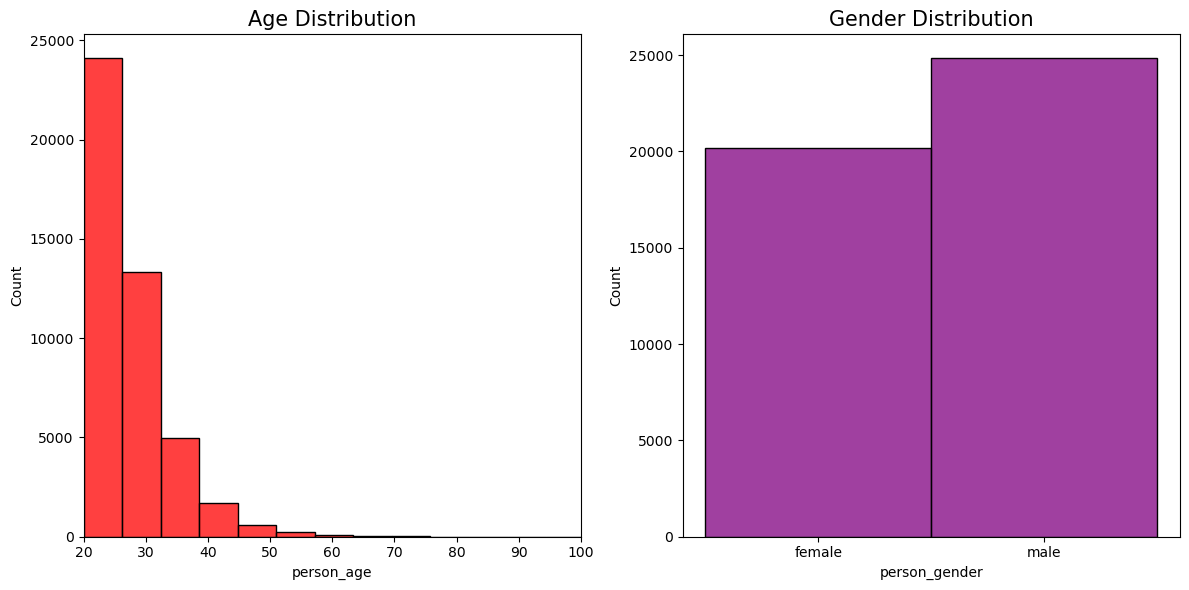

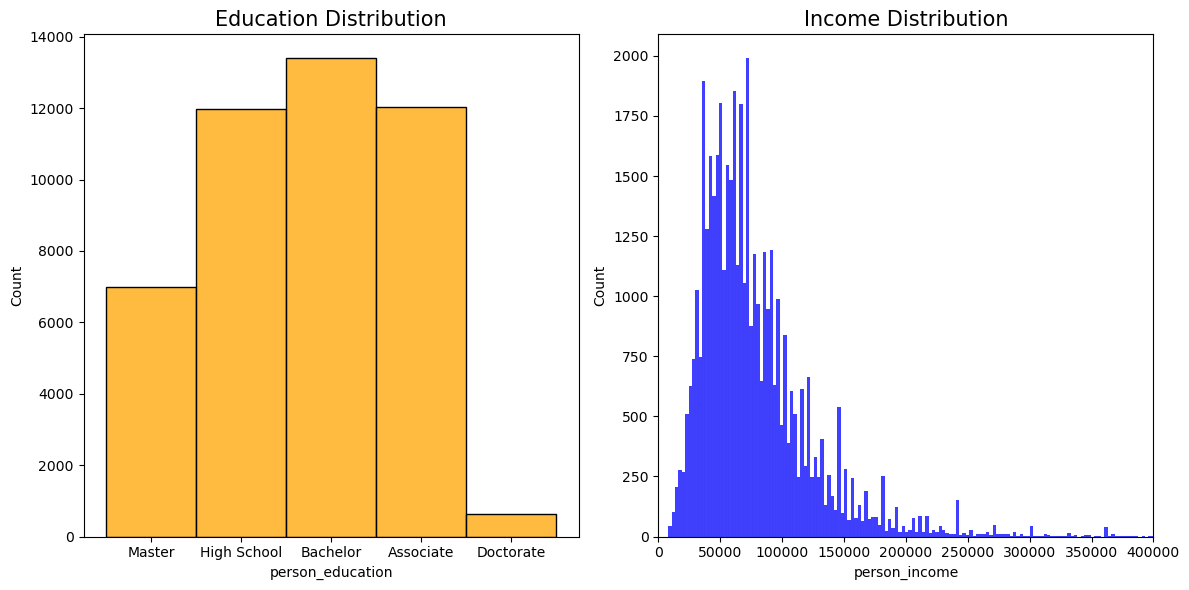

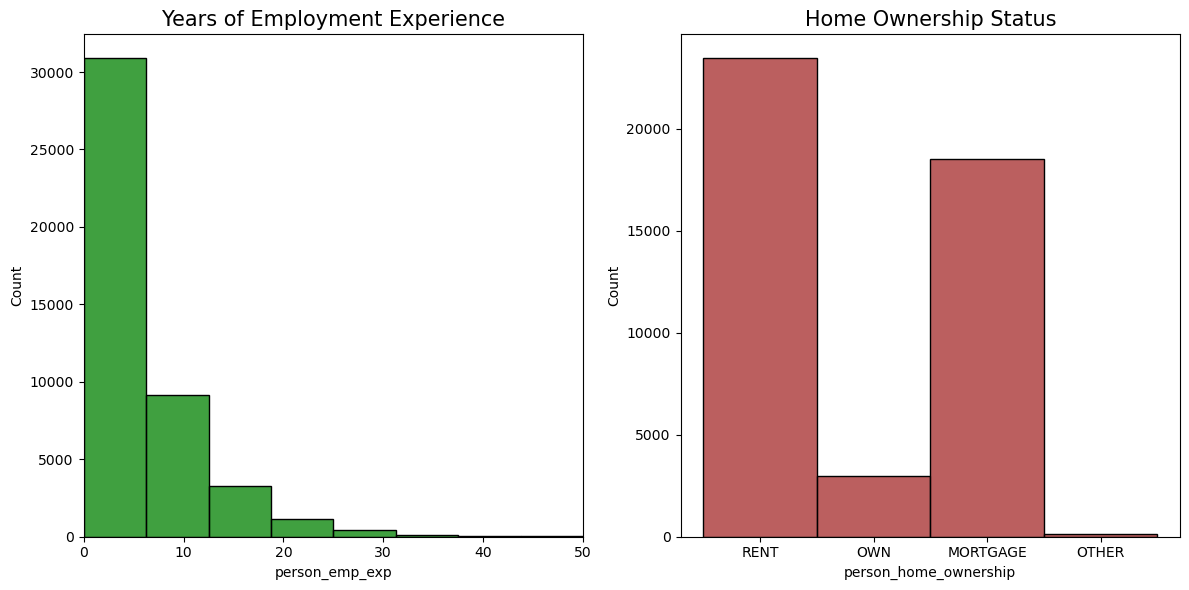

In [12]:
### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, middle, bottom) = bigfig.subfigures(3,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='person_age', bins=20, ax=ax1, color="red")
ax1.set_xlim(20, 100)
ax1.set_title('Age Distribution', size=15)

ax2 = sns.histplot(data=data, x='person_gender', ax=ax2,color="purple")
ax2.set_title('Gender Distribution', size=15)

plt.tight_layout()

### Middle figure ###
middle.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='person_education', ax=ax1, color="orange")
ax1.set_title('Education Distribution', size=15)

ax2 = sns.histplot(data=data, x='person_income', ax=ax2,color="blue")
ax2.set_title('Income Distribution', size=15)
ax2.set_xlim(0, 400000)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='person_emp_exp',bins=20, ax=ax1,color="green")
ax1.set_title('Years of Employment Experience', size=15)
ax1.set_xlim(0, 50)

ax2 = sns.histplot(data=data, x='person_home_ownership', ax=ax2,color="Brown")
ax2.set_title('Home Ownership Status', size=15)

plt.tight_layout()

One can notice that:
* The person age and experience distributions are right skewed and have many outliers. Some of them are unrealistic, like persons of 140 years of age.
* There is a slight excess of male clients, even though the gender distribution is quite balanced.
* The majority of clients either pay rent or a mortgage.
* The income distribution is bell-shaped, but right skewed.

In [13]:
num_features_one = ['person_age', 'person_income', 'person_emp_exp']

for col in num_features_one:

    print(f"Skewness of {col}: {skew(data[col])}")
    print(f"Kurtosis of {col}: {kurtosis(data[col])}")
    print()

Skewness of person_age: 2.5480690657849285
Kurtosis of person_age: 18.64724355494631

Skewness of person_income: 34.13644520299569
Kurtosis of person_income: 2398.418123917783

Skewness of person_emp_exp: 2.594830874585158
Kurtosis of person_emp_exp: 19.166060676086243



These numbers show that the three distributions that I examined are highly skewed. They are leptokurtic distributions (kurtosis > 3, excess kurtosis > 0), which means that they have a sharp peak and heavy tails.

<Figure size 1200x600 with 0 Axes>

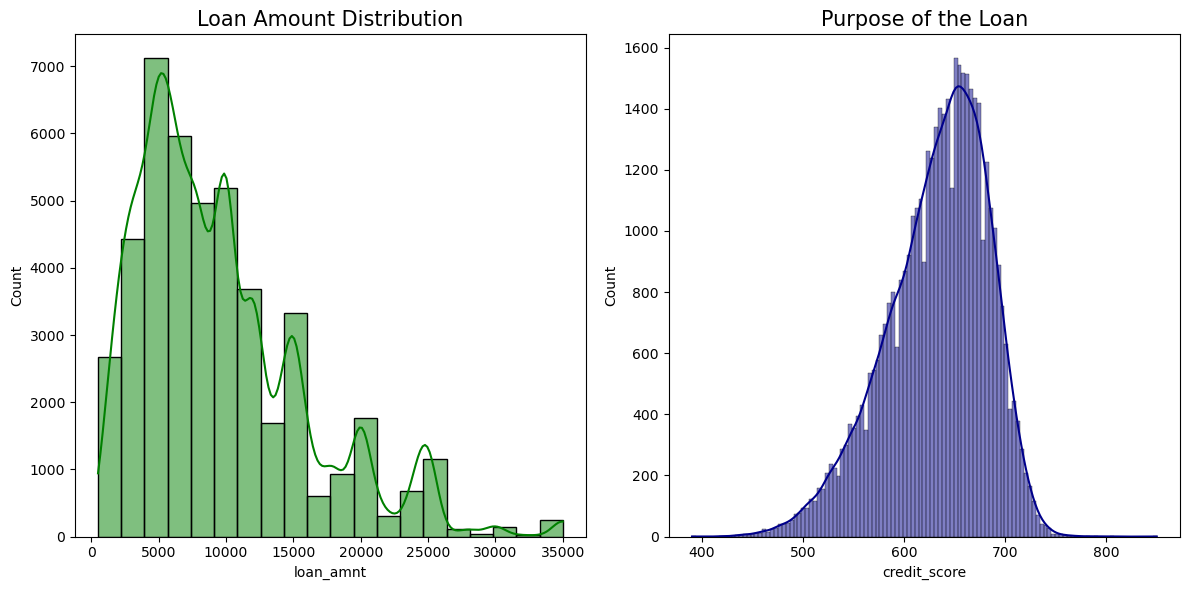

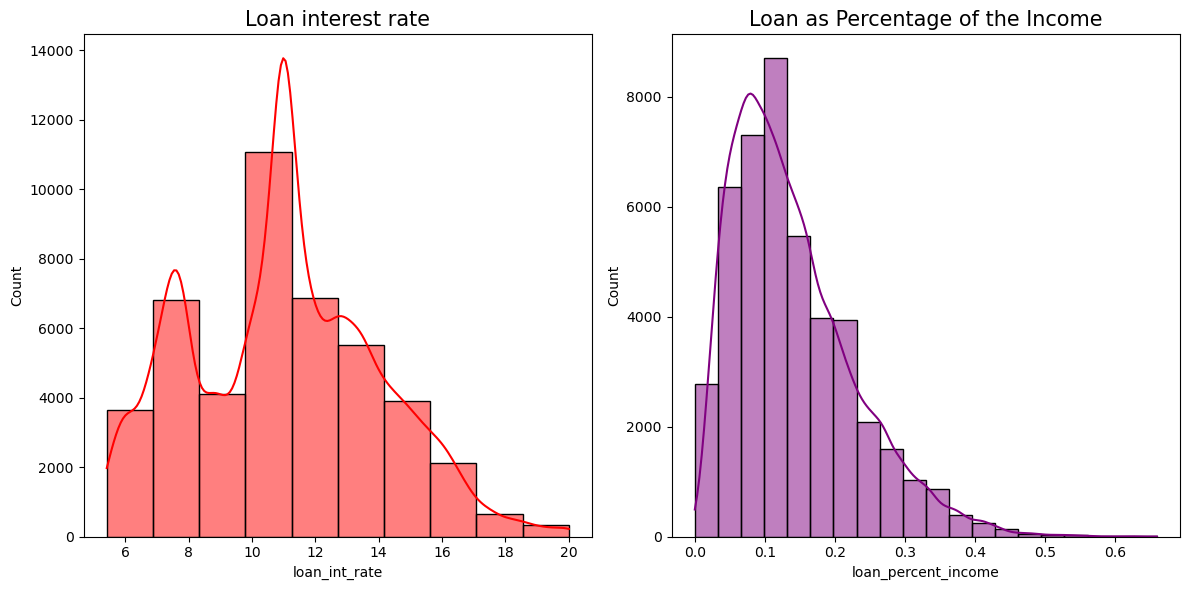

In [14]:
### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, bottom) = bigfig.subfigures(2,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='loan_amnt', bins=20, ax=ax1,kde=True,color="green")
ax1.set_title('Loan Amount Distribution', size=15)

ax2 = sns.histplot(data=data, x='credit_score', ax=ax2,kde=True,color="darkblue")
ax2.set_title('Purpose of the Loan', size=15)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='loan_int_rate', bins=10, ax=ax1, kde=True,color="red")
ax1.set_title('Loan interest rate', size=15)

ax2 = sns.histplot(data=data, x='loan_percent_income', bins=20, ax=ax2, kde=True,color="purple")
ax2.set_title('Loan as Percentage of the Income', size=15)

plt.tight_layout()

In [15]:
num_features_two = ['loan_amnt', 'loan_int_rate', 'loan_percent_income']

for col in num_features_two:

    print(f"Skewness of {col}: {skew(data[col])}")
    print(f"Kurtosis of {col}: {kurtosis(data[col])}")
    print()

Skewness of loan_amnt: 1.1796919608876142
Kurtosis of loan_amnt: 1.3509317700975298

Skewness of loan_int_rate: 0.2137769461856264
Kurtosis of loan_int_rate: -0.42042193612408285

Skewness of loan_percent_income: 1.0344776671250524
Kurtosis of loan_percent_income: 1.0821626461535354



<Figure size 1200x600 with 0 Axes>

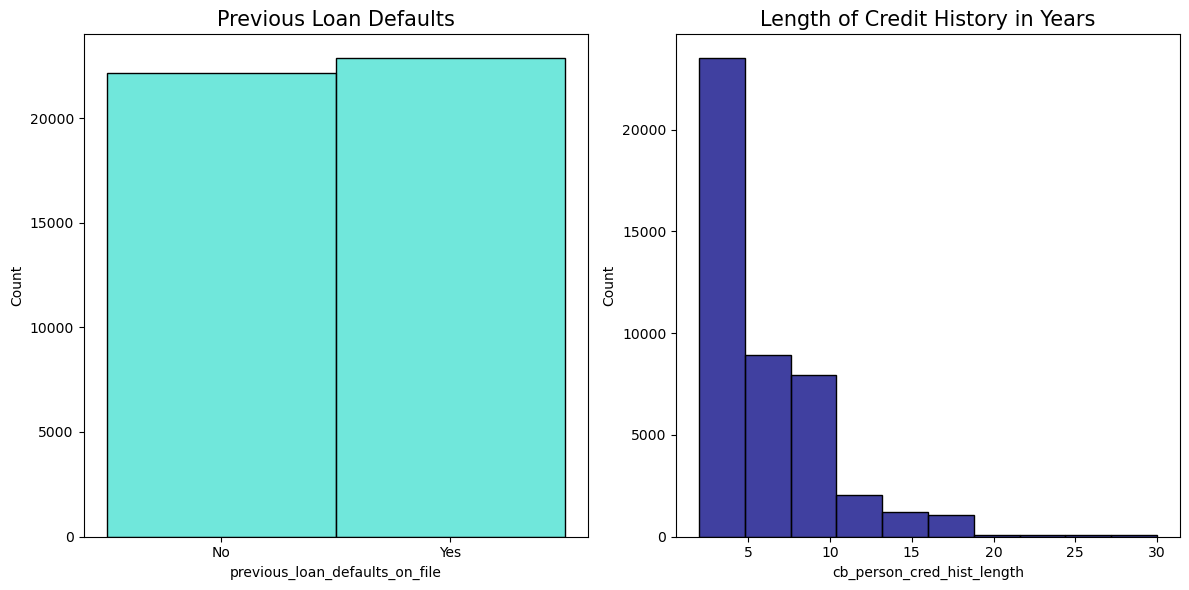

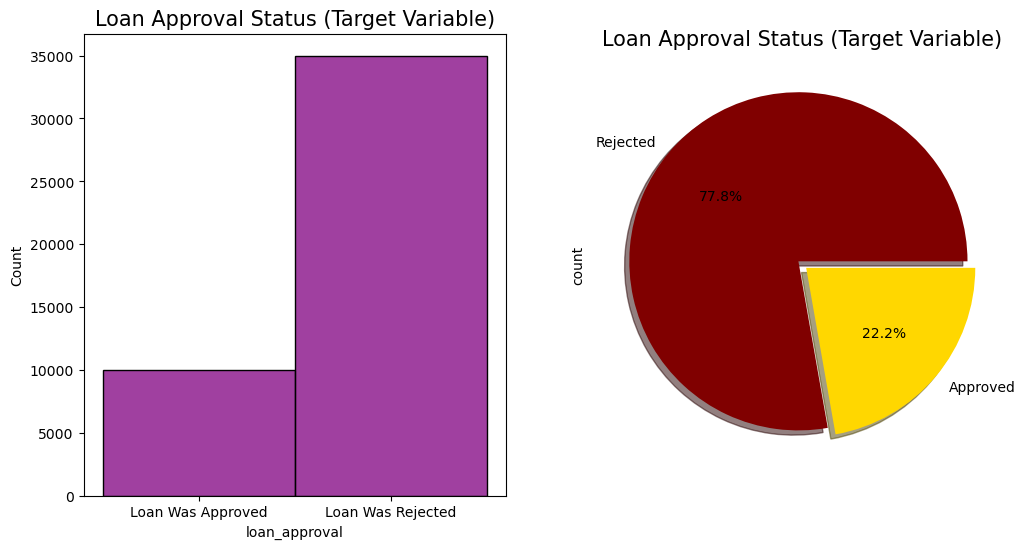

<Figure size 640x480 with 0 Axes>

In [20]:
##########################
loan_approval = {0:'Loan Was Rejected', 1:'Loan Was Approved'}
data['loan_approval'] = data['loan_status'].map(loan_approval)

val = data['loan_approval'].value_counts()
##########################

### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, bottom) = bigfig.subfigures(2,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='previous_loan_defaults_on_file', ax=ax1,color="Turquoise")
ax1.set_title('Previous Loan Defaults', size=15)

ax2 = sns.histplot(data=data, x='cb_person_cred_hist_length',bins=10,ax=ax2,color="navy")
ax2.set_title('Length of Credit History in Years', size=15)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='loan_approval', ax=ax1,color="purple")
ax1.set_title('Loan Approval Status (Target Variable)', size=15)

ax = val.plot(kind='pie', labels=['Rejected', 'Approved'], autopct="%1.1f%%", 
              shadow=True, colors=["maroon", "gold"], explode=(0.03, 0.03))

ax.set_title('Loan Approval Status (Target Variable)', size=15)
plt.show()

plt.tight_layout()

In [21]:
data.drop('loan_approval', axis=1, inplace=True)

One can notice that:
* Around half of the clients that asked for a loan have a history of loan default.
* The majority of loan requests were rejected. It will be interesting to find what are the main reasons for the loan rejection.

## 2.2 Loan Interest Rate

I am curious to find what are the main factors that determine the large variability in the loan interest rate.

<Figure size 1200x600 with 0 Axes>

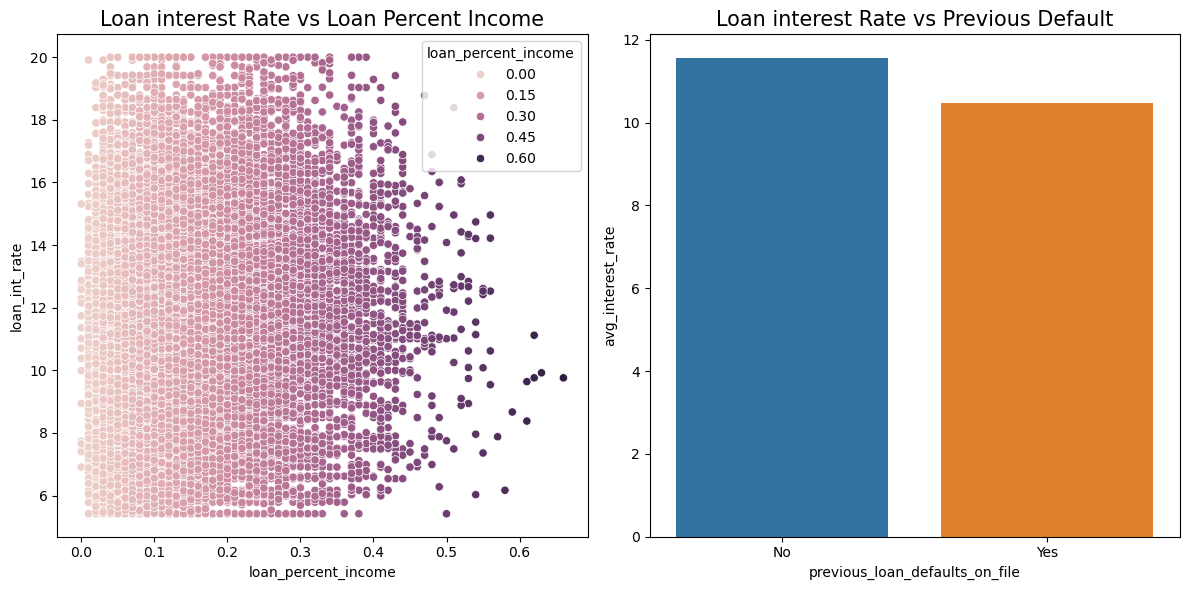

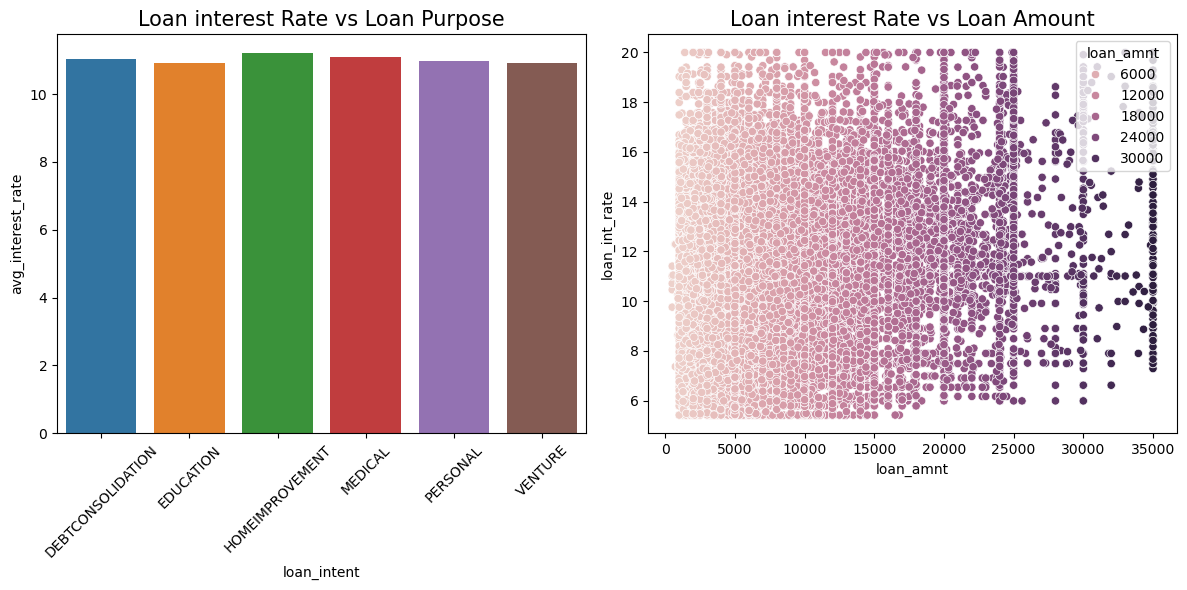

In [22]:
#######################################
int_rate_default = data.groupby('previous_loan_defaults_on_file')['loan_int_rate'].mean().reset_index(name='avg_interest_rate')

int_rate_purpose = data.groupby('loan_intent')['loan_int_rate'].mean().reset_index(name='avg_interest_rate')
#######################################

### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, bottom) = bigfig.subfigures(2,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.scatterplot(data=data, x='loan_percent_income', y='loan_int_rate', ax=ax1,hue="loan_percent_income")
ax1.set_title('Loan interest Rate vs Loan Percent Income', size=15)

ax2 = sns.barplot(data=int_rate_default, x='previous_loan_defaults_on_file', y='avg_interest_rate', ax=ax2,hue="previous_loan_defaults_on_file")
ax2.set_title('Loan interest Rate vs Previous Default', size=15)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.barplot(data=int_rate_purpose, x='loan_intent', y='avg_interest_rate', ax=ax1,hue="loan_intent")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title('Loan interest Rate vs Loan Purpose', size=15)

ax2 = sns.scatterplot(data=data, x='loan_amnt', y='loan_int_rate', ax=ax2, hue="loan_amnt")
ax2.set_title('Loan interest Rate vs Loan Amount', size=15)

plt.tight_layout()

Apparently, there is no relation between the interest rate and other variables, like the person income or the loan purpose.

Let's plot a correlation heatmap to further explore this issue.

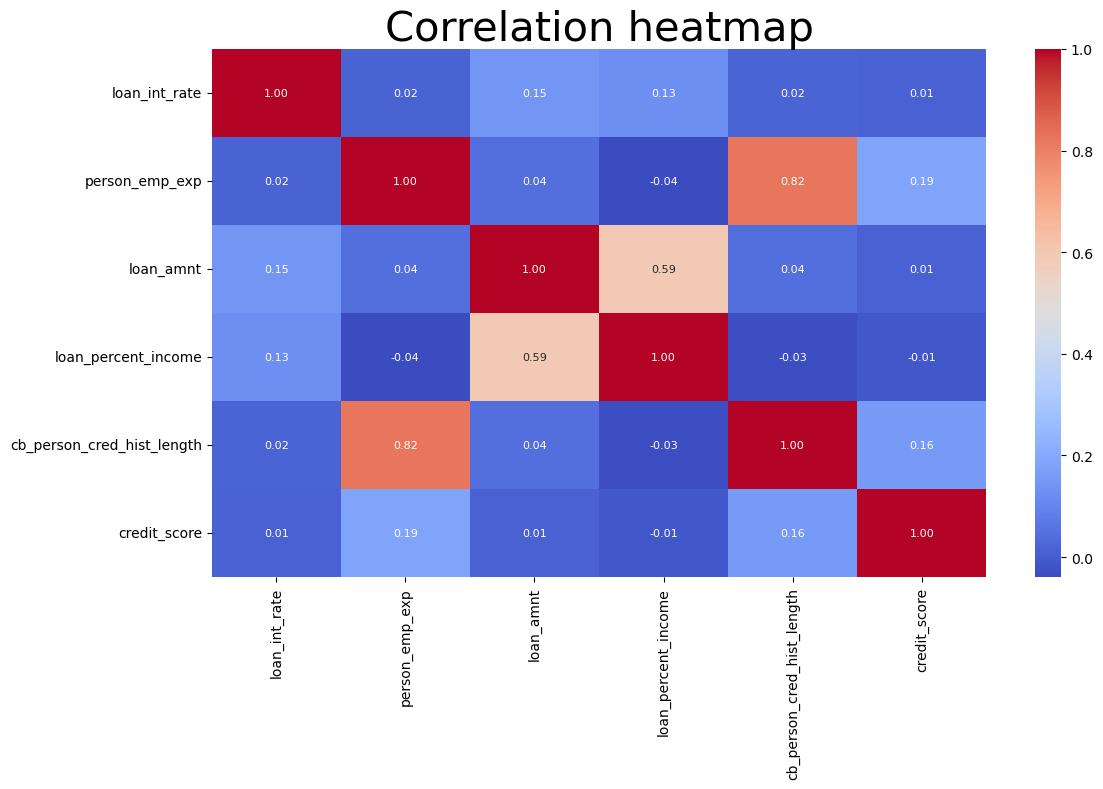

In [23]:
selected_features = ['loan_int_rate', 
                     'person_emp_exp', 
                     'loan_amnt', 
                     'loan_percent_income',
                     'cb_person_cred_hist_length',
                     'credit_score']

plt.figure(figsize=(12,8))
sns.heatmap(data[selected_features].corr(method='pearson'),annot=True,fmt='.2f',annot_kws={"fontsize":8}, cmap='coolwarm')
plt.title('Correlation heatmap',fontsize=30)

plt.tight_layout()
plt.show()

As shown by the heatmap, the loan interest rate has little or no correlation with the other variables. I wonder what are the factors that can make the rate either small or large.

## 2.3 Outliers

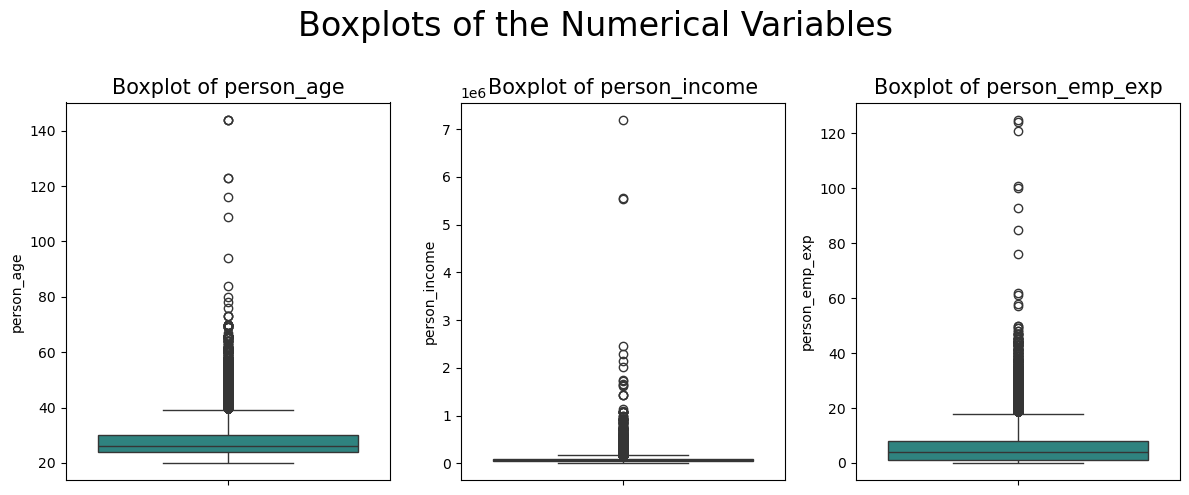

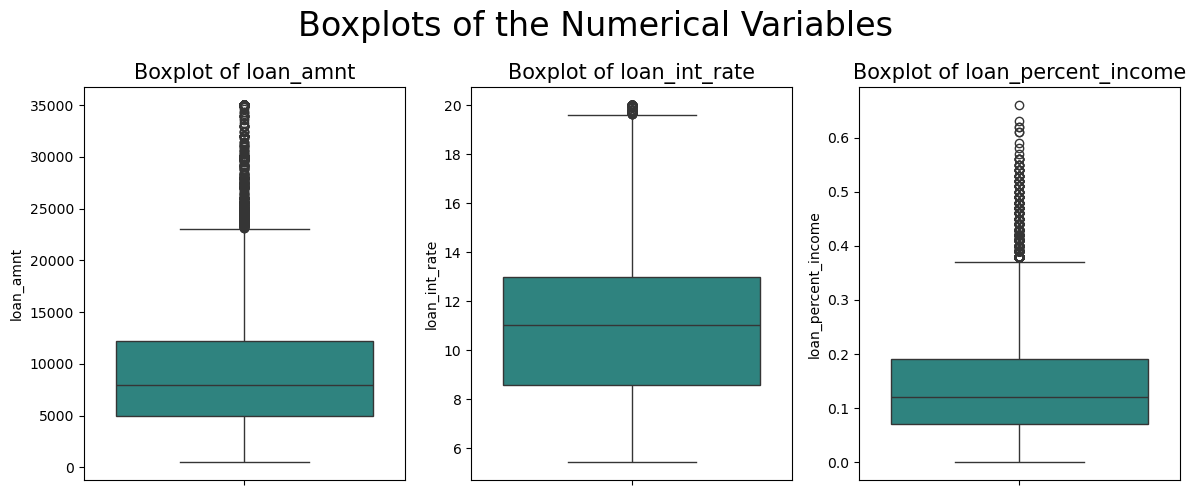

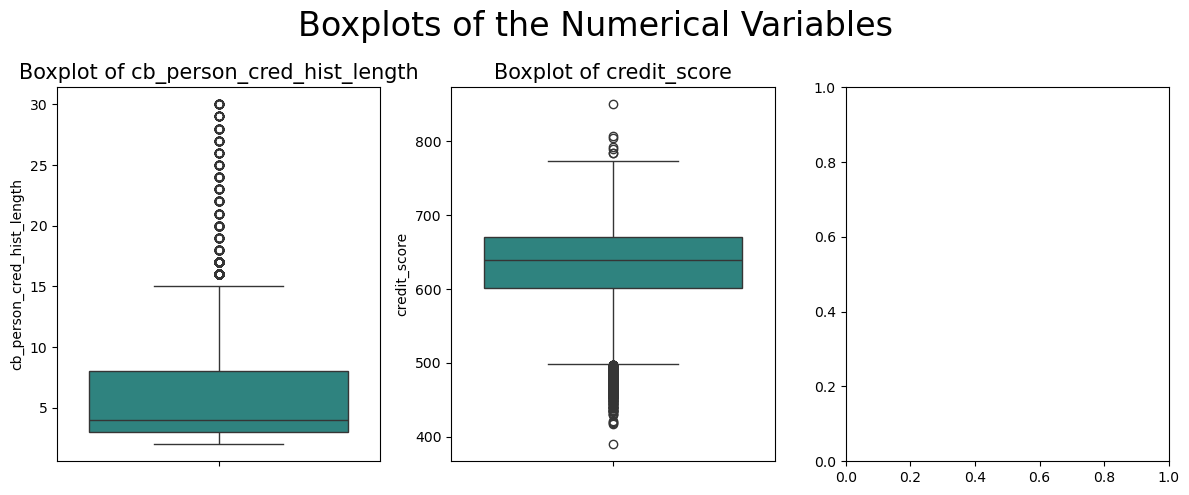

In [24]:
num_features = [col for col in data.columns if data[col].dtypes != 'O']

num_features.remove('loan_status')


def plot_boxplots(data):

    for i in range(3):

        fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,5))
        ax1 = sns.boxplot(data[num_features[i*3]], ax=ax1,palette="viridis")
        ax1.set_title('Boxplot of '+str(num_features[i*3]), fontsize=15)
        ax2 = sns.boxplot(data[num_features[i*3+1]], ax=ax2,palette="viridis")
        ax2.set_title('Boxplot of '+str(num_features[i*3+1]), fontsize=15)
        if i < 2:
            ax3 = sns.boxplot(data[num_features[i*3+2]], ax=ax3,palette="viridis")
            ax3.set_title('Boxplot of '+str(num_features[i*3+2]), fontsize=15)
    
        fig.suptitle(f"Boxplots of the Numerical Variables", fontsize=24)    
    
        plt.tight_layout()


plot_boxplots(data)

In [25]:
def outliers_percentage(data):

    outliers_perc = []

    for k,v in data.items():
        # Column must be of numeric type (not object)
        if data[k].dtype != 'O':
            q1 = v.quantile(0.25)
            q3 = v.quantile(0.75)
            irq = q3 - q1
            v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
            perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
            out_tuple = (k,int(perc))
            outliers_perc.append(out_tuple)
            print("Column %s outliers = %.2f%%" % (k,perc))

outliers_percentage(data[num_features])  

Column person_age outliers = 5.73%
Column person_income outliers = 4.93%
Column person_emp_exp outliers = 3.83%
Column loan_amnt outliers = 5.22%
Column loan_int_rate outliers = 0.28%
Column loan_percent_income outliers = 2.00%
Column cb_person_cred_hist_length outliers = 3.04%
Column credit_score outliers = 1.04%


The fractions of outliers in the numerical columns are relatively small. The outliers are thus safe to remove.

# 3. Data Preprocessing
<a id="3"></a>

## 3.1 Outliers Capping

In [26]:
def remove_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data


capped_data = data.copy()

for col in num_features:

    capped_data = remove_outliers_iqr(capped_data, col)

Below, I am comparing the distributions of the control group variables before and after capping the outliers.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(data, capped_data, num_features):
    for i in range(3):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

        sns.kdeplot(data[num_features[i * 3]], ax=ax1, color='steelblue', label='+ outliers')
        sns.kdeplot(capped_data[num_features[i * 3]], ax=ax1, color='orange', label='no outliers')
        ax1.set_title('Distribution of ' + str(num_features[i * 3]), fontsize=15)
        ax1.legend(fontsize=8, loc='upper right')

        sns.kdeplot(data[num_features[i * 3 + 1]], ax=ax2, color='steelblue', label='+ outliers')
        sns.kdeplot(capped_data[num_features[i * 3 + 1]], ax=ax2, color='orange', label='no outliers')
        ax2.set_title('Distribution of ' + str(num_features[i * 3 + 1]), fontsize=15)
        ax2.legend(fontsize=8, loc='upper right')

        if i * 3 + 2 < len(num_features):  # Ensure index doesn't go out of range
            sns.kdeplot(data[num_features[i * 3 + 2]], ax=ax3, color='steelblue', label='+ outliers')
            sns.kdeplot(capped_data[num_features[i * 3 + 2]], ax=ax3, color='orange', label='no outliers')
            ax3.set_title('Distribution of ' + str(num_features[i * 3 + 2]), fontsize=15)
            ax3.legend(fontsize=8, loc='upper right')

        plt.tight_layout()
        plt.show()


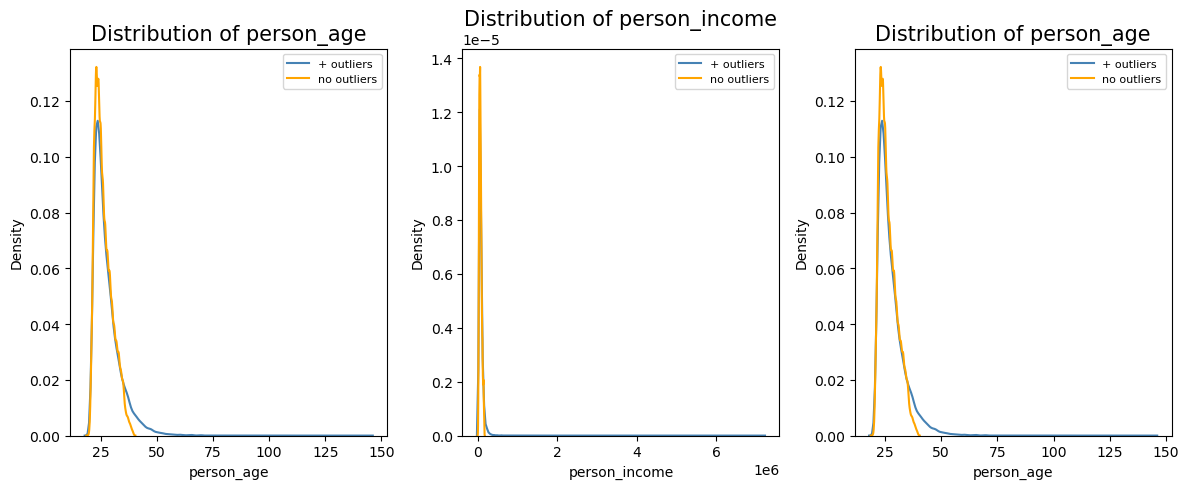

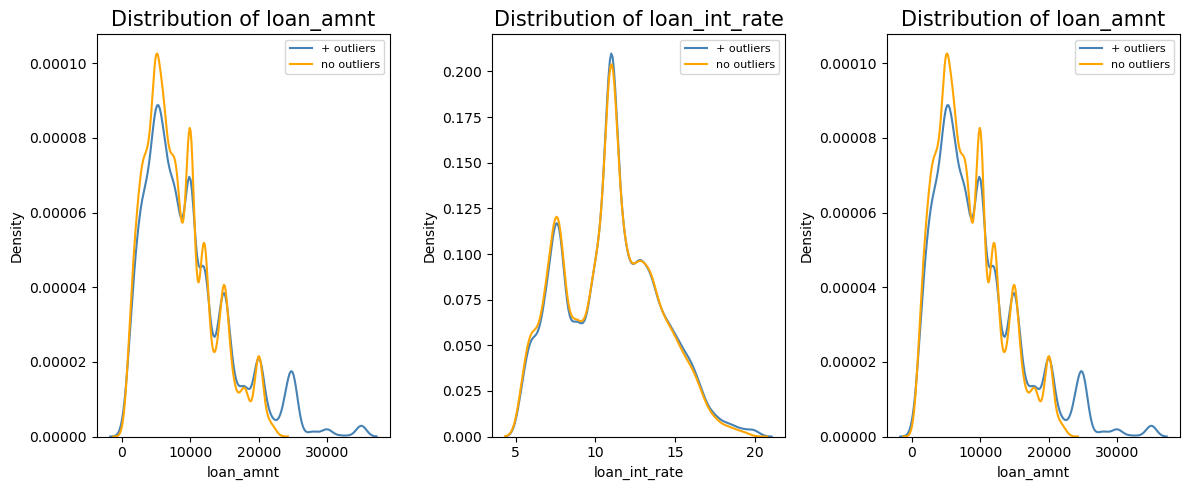

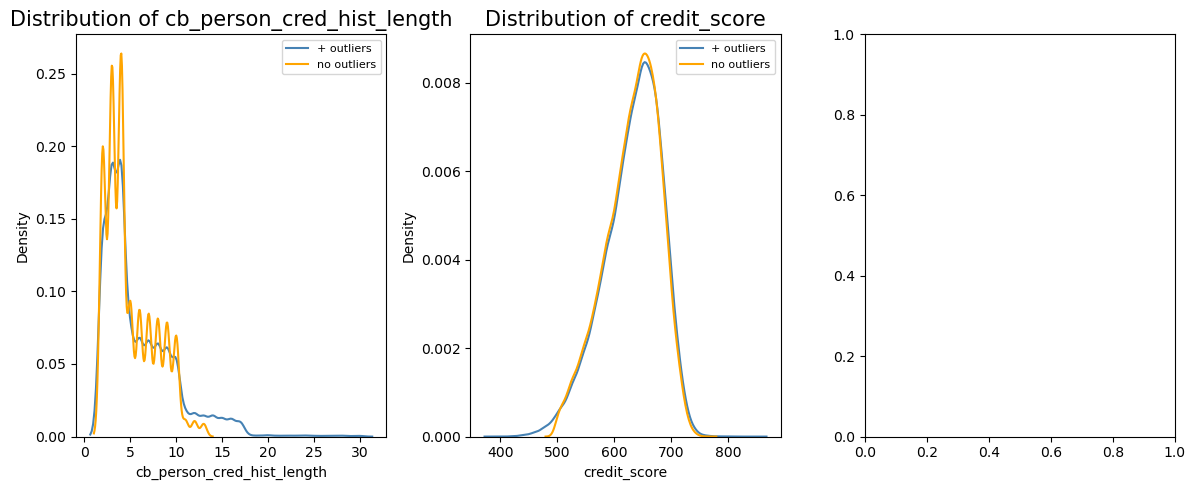

In [27]:
def plot_distributions(data, capped_data):

    for i in range(3):

        fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,5))

        ax1 = sns.kdeplot(data[num_features[i*3]], ax=ax1, color='steelblue', label='+ outliers')
        ax1 = sns.kdeplot(capped_data[num_features[i*3]], ax=ax1, color='orange', label='no outliers')
        ax1.set_title('Distribution of '+str(num_features[i*3]), fontsize=15)
        ax1.legend(fontsize=8, loc='upper right')

        ax2 = sns.kdeplot(data[num_features[i*3+1]], ax=ax2, color='steelblue', label='+ outliers')
        ax2 = sns.kdeplot(capped_data[num_features[i*3+1]], ax=ax2, color='orange', label='no outliers')
        ax2.set_title('Distribution of '+str(num_features[i*3+1]), fontsize=15)
        ax2.legend(fontsize=8, loc='upper right')

        if i < 2:
            ax3 = sns.kdeplot(data[num_features[i*3]], ax=ax3, color='steelblue', label='+ outliers')
            ax3 = sns.kdeplot(capped_data[num_features[i*3]], ax=ax3, color='orange', label='no outliers')
            ax3.set_title('Distribution of '+str(num_features[i*3]), fontsize=15)
            ax3.legend(fontsize=8, loc='upper right')
    
        plt.tight_layout()


plot_distributions(data, capped_data)

Then, I am having a look at the skewness and kurtosis of the variable distributions. I want to see if the variables are more 'bell-shaped' than before.

In [28]:
print('##### Skewness and kurtosis after outliers capping ##### \n')

for col in num_features:

    print(f"Skewness of {col}: {skew(capped_data[col])}")
    print(f"Kurtosis of {col}: {kurtosis(capped_data[col])}")
    print()

##### Skewness and kurtosis after outliers capping ##### 

Skewness of person_age: 0.8332576383223101
Kurtosis of person_age: -0.00044276170210322263

Skewness of person_income: 0.7304305154472135
Kurtosis of person_income: 0.09207264087009515

Skewness of person_emp_exp: 0.8947171977883184
Kurtosis of person_emp_exp: 0.030591506491959297

Skewness of loan_amnt: 0.73910383306941
Kurtosis of loan_amnt: -0.08602595958290582

Skewness of loan_int_rate: 0.15695724993566545
Kurtosis of loan_int_rate: -0.5732647408021432

Skewness of loan_percent_income: 0.6080250250748
Kurtosis of loan_percent_income: -0.346650026917696

Skewness of cb_person_cred_hist_length: 0.8477000988338078
Kurtosis of cb_person_cred_hist_length: -0.2499588605626233

Skewness of credit_score: -0.4772494248773158
Kurtosis of credit_score: -0.28698076044001386



In [29]:
print('##### Skewness and kurtosis before outliers capping ##### \n')

for col in num_features_one:

    print(f"Skewness of {col}: {skew(data[col])}")
    print(f"Kurtosis of {col}: {kurtosis(data[col])}")
    print()

##### Skewness and kurtosis before outliers capping ##### 

Skewness of person_age: 2.5480690657849285
Kurtosis of person_age: 18.64724355494631

Skewness of person_income: 34.13644520299569
Kurtosis of person_income: 2398.418123917783

Skewness of person_emp_exp: 2.594830874585158
Kurtosis of person_emp_exp: 19.166060676086243



One can notice that the distributions are more 'bell-shaped' than before the outliers capping. The next step might be to apply a Log or Box-Cox transformation to further 'improve' the shape of the variables.

## 3.2 Label Encoding, Scaling and Train-Test Split

**Label encoding**

In [30]:
### Label encoding ###
encoder = LabelEncoder()

for col in ['person_gender', 'previous_loan_defaults_on_file']:

    capped_data[col] = encoder.fit_transform(capped_data[col])

### One-hot encoding ###    
capped_data = pd.get_dummies(capped_data)

capped_data.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False
5,21.0,0,12951.0,0,2500.0,7.14,0.19,2.0,532,0,1,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True
9,21.0,0,12739.0,0,1600.0,14.74,0.13,3.0,640,0,1,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True
19,24.0,0,14283.0,1,1750.0,10.99,0.12,2.0,679,0,1,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False
23,24.0,0,13866.0,0,1500.0,7.29,0.11,3.0,600,1,0,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False


**Scaling**

In [31]:
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

STD_list = ['person_age', 
            'person_income',
            'person_emp_exp',
            'loan_amnt', 
            'loan_int_rate', 
            'loan_percent_income',
            'cb_person_cred_hist_length', 
            'credit_score']

capped_data[STD_list] = std_scaler.fit_transform(capped_data[STD_list])

capped_data.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,-1.397526,0,-1.830558,-1.049912,-1.521531,0.088362,-0.694715,-1.131487,-2.686504,1,0,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False
5,-1.397526,0,-1.809362,-1.049912,-1.207867,-1.277781,0.841907,-1.131487,-2.099303,0,1,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True
9,-1.397526,0,-1.816079,-1.049912,-1.396065,1.317892,0.003749,-0.754084,0.165618,0,1,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True
19,-0.621788,0,-1.767160,-0.792046,-1.364699,0.037132,-0.135944,-1.131487,0.983506,0,1,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False
23,-0.621788,0,-1.780372,-1.049912,-1.416976,-1.226551,-0.275637,-0.754084,-0.673241,1,0,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False


**Train-test split**

In [32]:
X = capped_data.drop('loan_status', axis=1)
y = capped_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28852, 25), (7213, 25), (28852,), (7213,))

# 4. Model Selection
<a id="4"></a>

## 4.1 Feature Importance and Correlations

**Feature Importance**

I will look at the relative importance of the features by means of a random forest classifier.

In [33]:
# Random Forest Model
random_forest = RandomForestClassifier(random_state=1, max_depth=20)
random_forest.fit(X_train, y_train)

importances = pd.DataFrame({'feature':X_train.columns, 'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False)
importances.head(15)

,feature,importance
9,previous_loan_defaults_on_file,0.232
5,loan_int_rate,0.165
6,loan_percent_income,0.152
2,person_income,0.128
8,credit_score,0.053
4,loan_amnt,0.052
18,person_home_ownership_RENT,0.032
0,person_age,0.030
3,person_emp_exp,0.025
7,cb_person_cred_hist_length,0.024


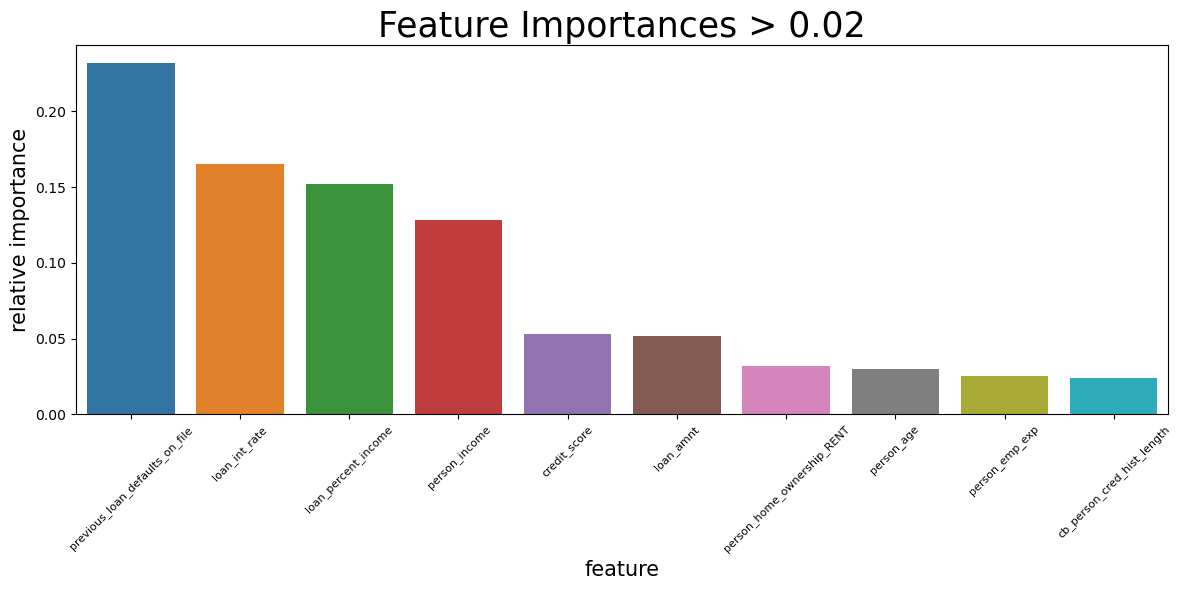

In [34]:
plt.figure(figsize=(12,6))

sns.barplot(importances[importances['importance'] > 0.02], x='feature', y='importance', hue = 'feature')

plt.title('Feature Importances > 0.02', fontsize=25)
plt.xlabel('feature', fontsize=15)
plt.xticks(fontsize=8, rotation=45)
plt.ylabel('relative importance', fontsize=15)
    
plt.tight_layout()
plt.show()

**Correlation heatmap**

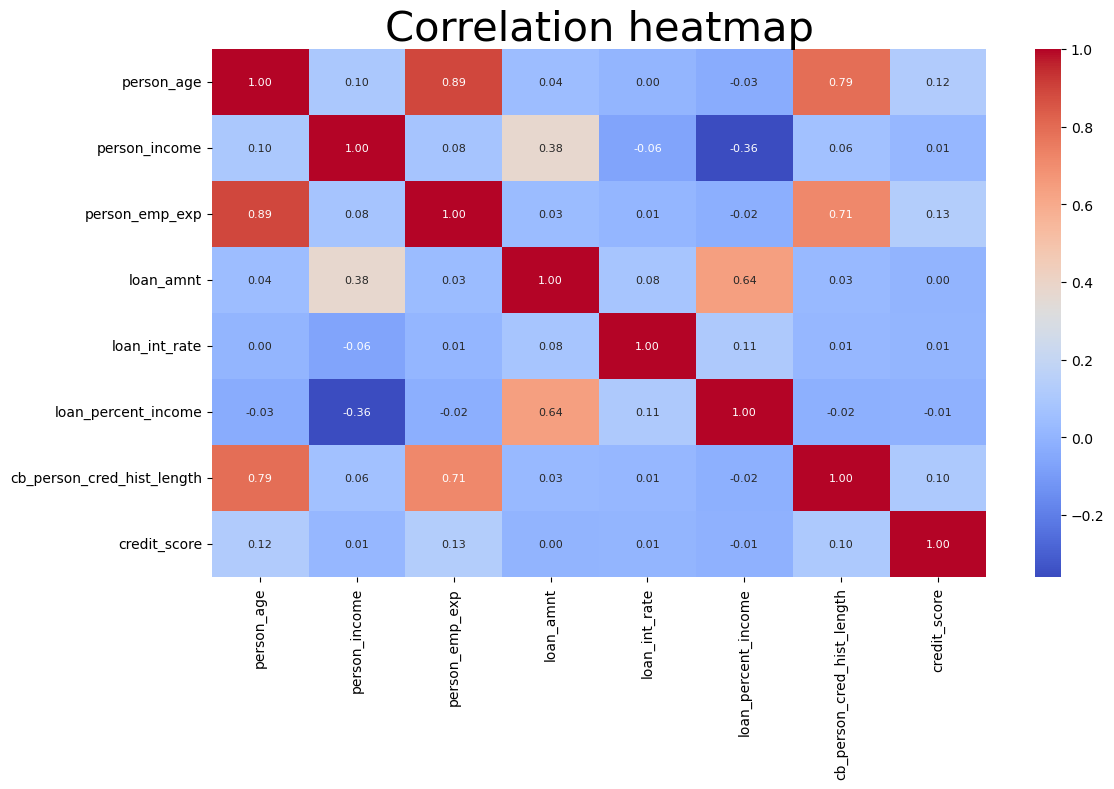

In [35]:
feat_list = ['person_age', 'person_income', 'person_emp_exp',
             'loan_amnt', 'loan_int_rate', 'loan_percent_income',
             'cb_person_cred_hist_length', 'credit_score']

plt.figure(figsize=(12,8))
sns.heatmap(capped_data[feat_list].corr(method='pearson'), annot=True, fmt='.2f', annot_kws={"fontsize":8},cmap='coolwarm')
plt.title('Correlation heatmap', fontsize=30)

plt.tight_layout()
plt.show()

There are some strong correlations between the variables, like that between age and work experience. None of them has a Pearson coefficient above 0.9, but I will have to monitor the situation in the modeling and fitting stage.

**Pairplot**

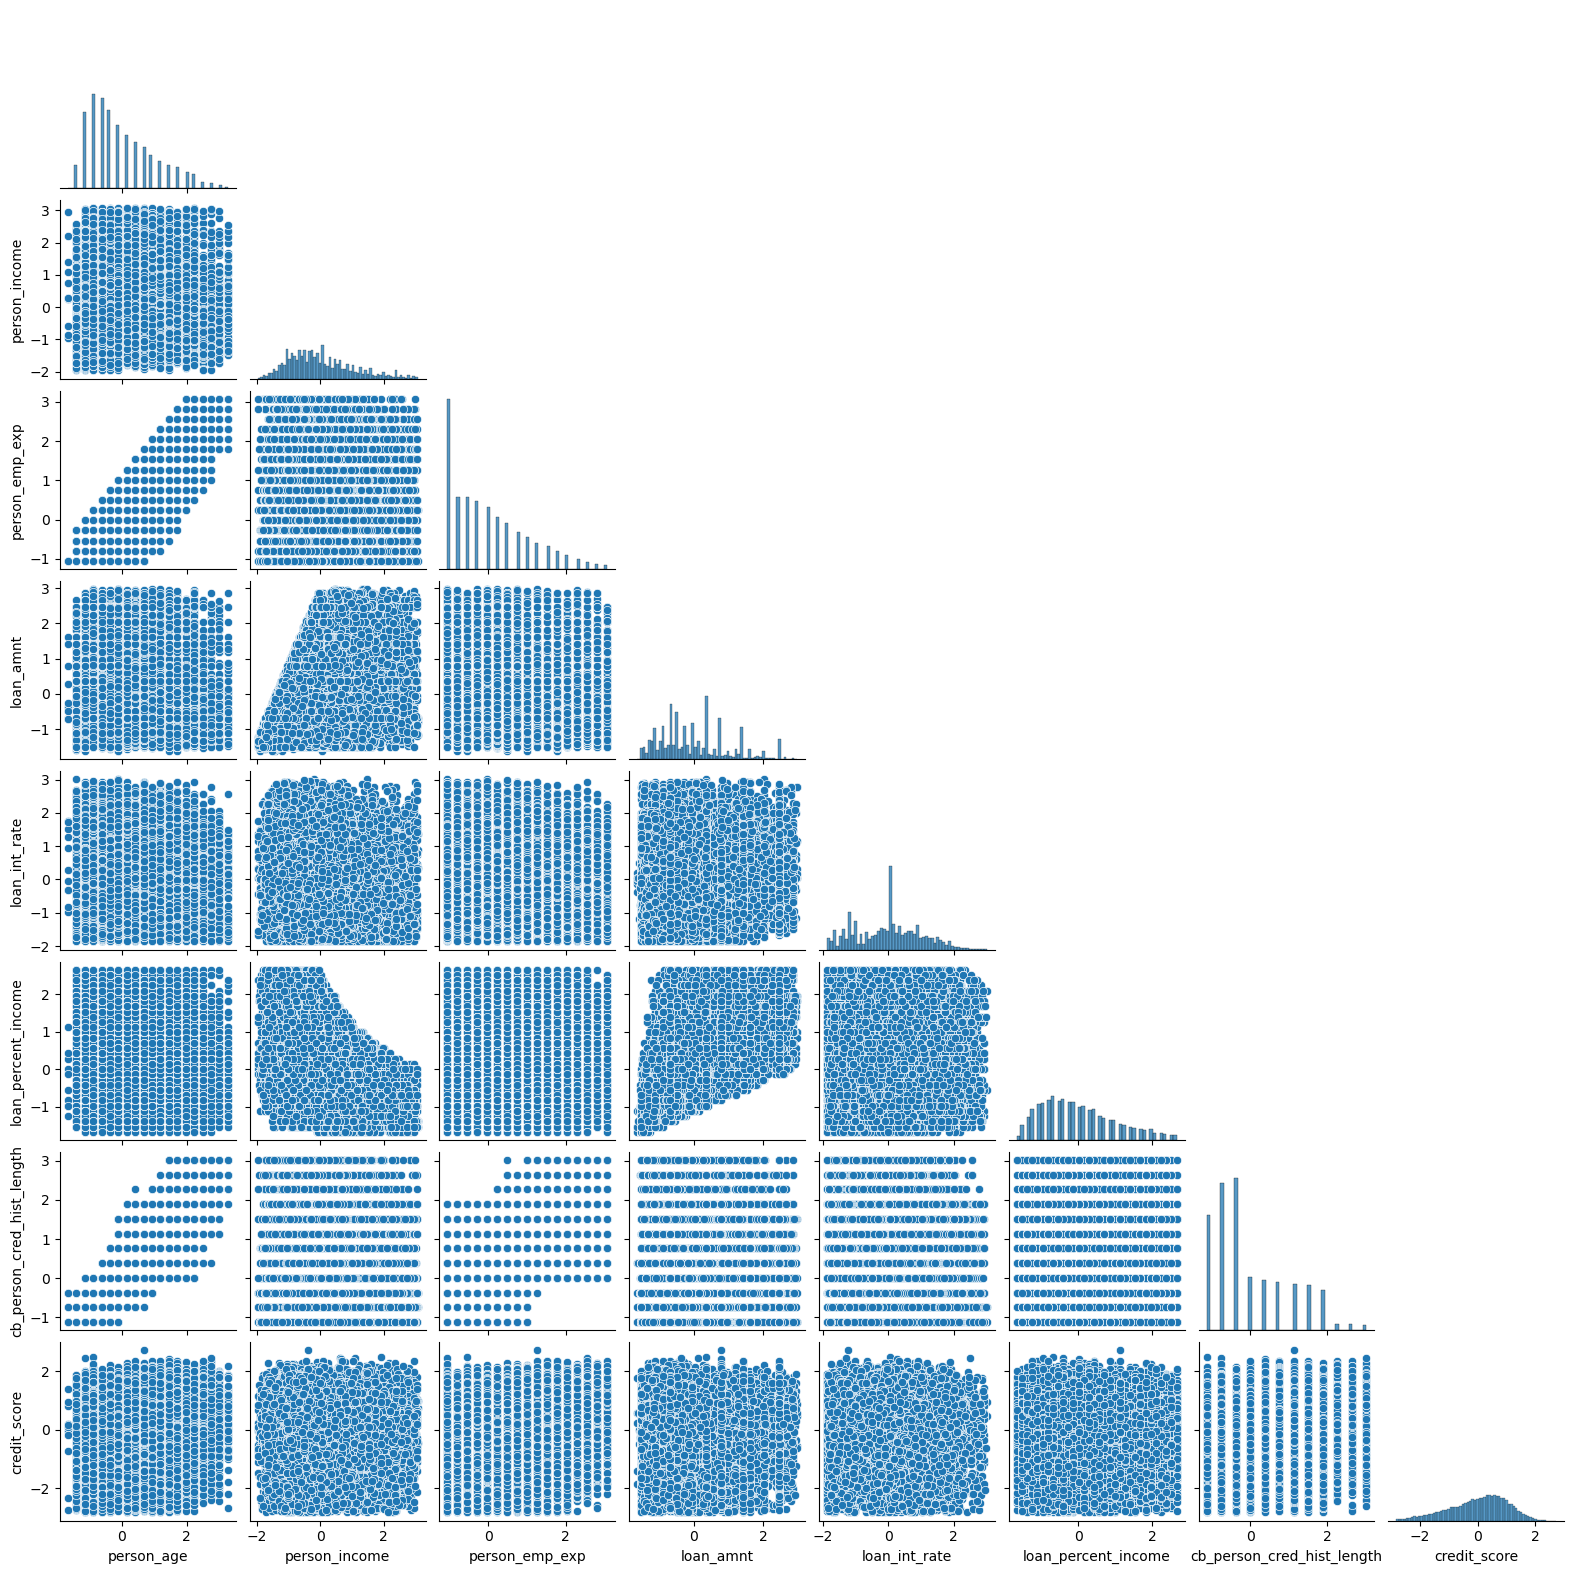

In [36]:
sns.pairplot(capped_data[feat_list], size=2, corner=True);

There are variables that are linearly related, like 'person_age' and 'person_emp_exp'. Again, I will have to monitor this during the modeling and fitting stage. I might have to drop some of these variables from X.

## 4.2 ML Model Selection

I am comparing the performance of some ML models on the data. This is how I will pick two or three of them to fine tune their parameters.

In [37]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}

    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start

    #  Get the predictions on the test set,
    #  then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time

    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy score on the first 300 training samples
    results['accuracy_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # Compute accuracy score on test set
    results['accuracy_test'] = accuracy_score(y_test,predictions_test)

    # Compute recall score on the first 300 training samples
    results['recall_train'] = recall_score(y_train[:300],predictions_train,average='macro')

    # Compute recall score on test set
    results['recall_test'] = recall_score(y_test,predictions_test,average='macro')
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__,sample_size))
        
    # Return the results
    return results

In [38]:
# Initialize the three models
clf_A = GradientBoostingClassifier(random_state=42)
clf_B = AdaBoostClassifier(DecisionTreeClassifier(random_state=42))
clf_C = RandomForestClassifier(random_state=42)
clf_D = XGBClassifier(random_state=42)
clf_E = SVC(random_state=42)

# Calculate the number of samples for 1%, 10%, 25%, 50%, 75% and 100% of the training data
samples_1   = int(round(len(X_train) / 100))
samples_10  = int(round(len(X_train) / 10))
samples_25  = int(round(len(X_train) / 4))
samples_50  = int(round(len(X_train) / 2))
samples_75  = int(round(len(X_train) * 0.75))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i,samples in enumerate([samples_1, samples_10, samples_25, samples_50, samples_75, samples_100]):
        results[clf_name][i] = \
        train_predict(clf,samples,X_train, y_train, X_test, y_test)

GradientBoostingClassifier trained on 289 samples.
GradientBoostingClassifier trained on 2885 samples.
GradientBoostingClassifier trained on 7213 samples.
GradientBoostingClassifier trained on 14426 samples.
GradientBoostingClassifier trained on 21639 samples.
GradientBoostingClassifier trained on 28852 samples.
AdaBoostClassifier trained on 289 samples.
AdaBoostClassifier trained on 2885 samples.
AdaBoostClassifier trained on 7213 samples.
AdaBoostClassifier trained on 14426 samples.
AdaBoostClassifier trained on 21639 samples.
AdaBoostClassifier trained on 28852 samples.
RandomForestClassifier trained on 289 samples.
RandomForestClassifier trained on 2885 samples.
RandomForestClassifier trained on 7213 samples.
RandomForestClassifier trained on 14426 samples.
RandomForestClassifier trained on 21639 samples.
RandomForestClassifier trained on 28852 samples.
XGBClassifier trained on 289 samples.
XGBClassifier trained on 2885 samples.
XGBClassifier trained on 7213 samples.
XGBClassifier 

In [39]:
# Printing out the values
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'25%', 3:'50%', 4:'75%', 5:'100%'}))

GradientBoostingClassifier


,1%,10%,25%,50%,75%,100%
train_time,0.329549,1.266929,2.630133,4.821883,8.032163,10.453911
pred_time,0.041844,0.037361,0.026355,0.041318,0.034492,0.036859
accuracy_train,0.990000,0.933333,0.920000,0.926667,0.913333,0.916667
accuracy_test,0.890198,0.920006,0.921808,0.920699,0.919728,0.921669
recall_train,0.989022,0.887135,0.861161,0.878400,0.860928,0.858919
recall_test,0.821533,0.849930,0.851060,0.849343,0.851290,0.849951


AdaBoostClassifier


,1%,10%,25%,50%,75%,100%
train_time,0.013837,0.040868,0.082716,0.141731,0.176572,0.175158
pred_time,0.010402,0.009629,0.009274,0.009079,0.009376,0.003933
accuracy_train,0.993333,1.000000,1.000000,1.000000,1.000000,1.000000
accuracy_test,0.853320,0.876334,0.886594,0.887564,0.893664,0.893803
recall_train,0.991264,1.000000,1.000000,1.000000,1.000000,1.000000
recall_test,0.786660,0.828431,0.833585,0.824738,0.843128,0.836826


RandomForestClassifier


,1%,10%,25%,50%,75%,100%
train_time,0.392459,0.672030,1.558250,2.639467,4.850130,6.290361
pred_time,0.150071,0.150508,0.178488,0.144958,0.238092,0.212721
accuracy_train,0.996667,1.000000,1.000000,1.000000,1.000000,1.000000
accuracy_test,0.894080,0.919867,0.921946,0.923472,0.925274,0.926937
recall_train,0.993506,1.000000,1.000000,1.000000,1.000000,1.000000
recall_test,0.802245,0.840899,0.846292,0.847759,0.849911,0.854020


XGBClassifier


,1%,10%,25%,50%,75%,100%
train_time,0.160756,0.216703,0.251328,0.319402,0.456542,0.349971
pred_time,0.062313,0.052454,0.051661,0.062864,0.035142,0.035635
accuracy_train,0.993333,1.000000,0.996667,0.980000,0.970000,0.973333
accuracy_test,0.887148,0.911271,0.922640,0.924581,0.927769,0.928185
recall_train,0.991264,1.000000,0.993506,0.961039,0.950061,0.956555
recall_test,0.820899,0.854422,0.865382,0.869154,0.873197,0.870647


SVC


,1%,10%,25%,50%,75%,100%
train_time,0.014628,0.419016,1.004767,6.564274,14.974736,27.169910
pred_time,0.321378,0.867664,4.145329,5.772751,8.469533,7.858398
accuracy_train,0.953333,0.930000,0.916667,0.913333,0.910000,0.906667
accuracy_test,0.880632,0.903369,0.908776,0.913905,0.915153,0.915015
recall_train,0.938850,0.893396,0.867422,0.869431,0.858686,0.856444
recall_test,0.782570,0.826723,0.834202,0.846106,0.845866,0.844246


The performance of the ML models on the test data are similar, but the Random Forest and AdaBoost classifiers overfit.

## 4.3 Model Parameter Optimization with Optuna

I am introducing a function that prints a table with the test scores.

In [40]:
def get_test_scores(model_name:str,preds,y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy  = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds, average='macro')
    recall    = recall_score(y_test_data, preds, average='macro')
    f1        = f1_score(y_test_data, preds, average='macro')

    table = pd.DataFrame({'model': [model_name],'precision': [precision],'recall': [recall],
                          'F1': [f1],'accuracy': [accuracy]})

    return table

I am also introducing a function to plot the validation curves of the model parameters. I will use this to find out what is the proper range of the parameters.

In [41]:
def plot_validation_curve(clf,X,y,CV,param_name,param_range,y_lim=[0.8, 0.95]):

    train_scores, test_scores = validation_curve(
                estimator = clf, 
                X = X_train, 
                y = y_train, 
                param_name = param_name, 
                param_range = param_range,
                cv = CV)

    train_mean = np.mean(train_scores,axis=1)
    train_std = np.std(train_scores,axis=1)
    test_mean = np.mean(test_scores,axis=1)
    test_std = np.std(test_scores,axis=1)

    plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

    plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

    plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

    plt.xlim([param_range[0], param_range[-1]])
    plt.ylim(y_lim)

    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel(f'{param_name}')
    plt.ylabel('Accuracy')
    plt.title(f'Validation Curve of {param_name}')

    plt.tight_layout()
    plt.gcf().patch.set_facecolor('lightsteelblue')
    plt.gca().set_facecolor('lemonchiffon')
    plt.show()

**Gradient Boosting Classifier**

I am plotting the validation curves of some important XGBoost parameters.

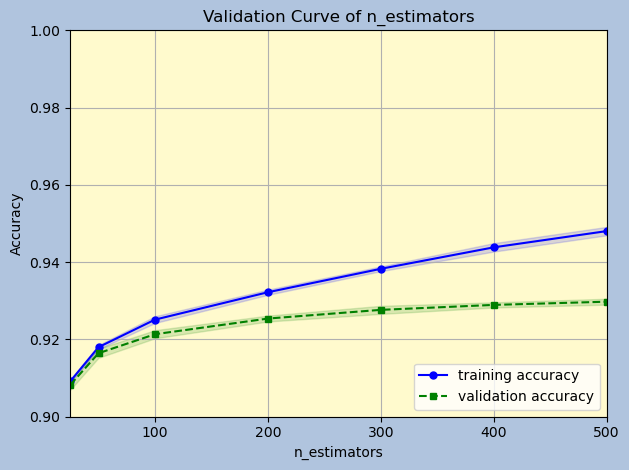

In [42]:
gb_class = GradientBoostingClassifier(random_state=42)

plot_validation_curve(gb_class, X_train, y_train, 4, 'n_estimators', [25,50,100,200,300,400,500], y_lim=[0.9,1.])

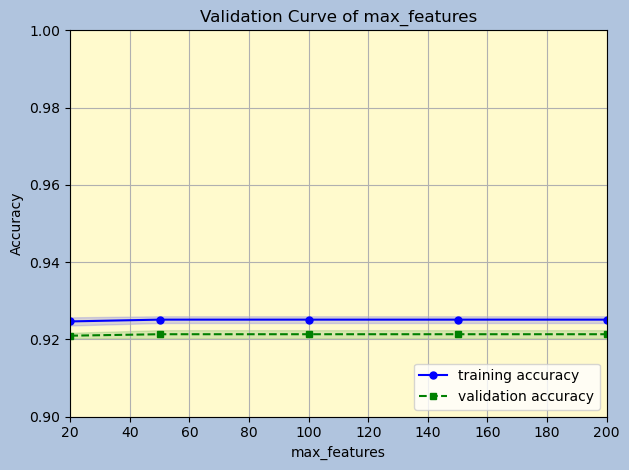

In [43]:
plot_validation_curve(gb_class, X_train, y_train, 4, 'max_features', [20,50,100,150,200], y_lim=[0.9,1.])

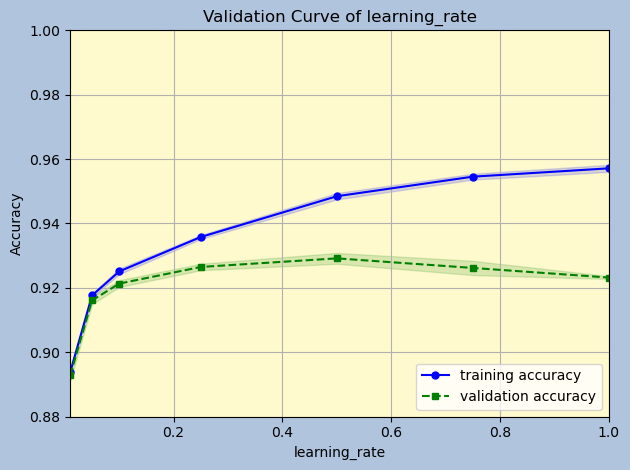

In [44]:
plot_validation_curve(gb_class, X_train, y_train, 4, 'learning_rate', [0.01,0.05,0.1,0.25,0.5,0.75,1.], y_lim=[0.88,1.])

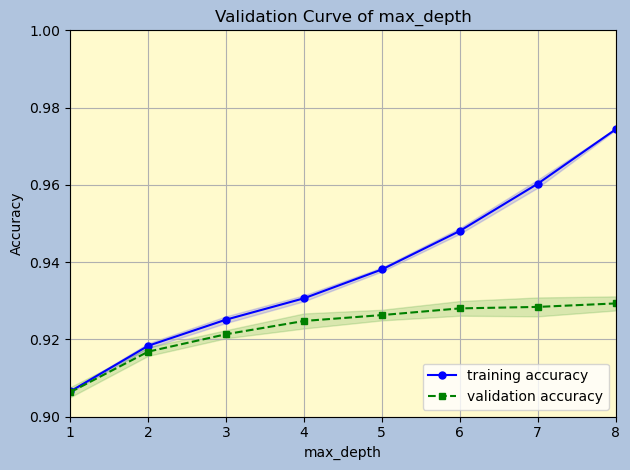

In [45]:
plot_validation_curve(gb_class, X_train, y_train, 4, 'max_depth',[1,2,3,4,5,6,7,8], y_lim=[0.9,1.])

Now, I will make use of Optuna to optimize the Gradient Boosting model parameters.

In a previous run of Optuna, I got these 'best' values for the parameteres:
* n_estimators: 300
* learning_rate: 0.2
* max_depth: 5

The accuracy on the test data was 0.932. Now, I am improving the fit by restricting the ranges of the parameters around the previous values and by running Optuna again.

**Please Note.** In order to save time, I am only running 20 trials of Optuna. To further improve the results one may run 50 trials or even more. However, if the number of runs is too large, one may end up overfitting on the train data.

In [46]:
def gradboost_objective(trial, X, y, cv, scoring):
    """
      An objective function to tune hyperparameters of Gradient Boosting Classifier.
      Args:
        trial: an Optuna trial
        X: DataFrame object, features
        y: Series object, Labels
        cv: k folds to cross-validate
        scoring: String, evaluation metric
      Return:
        Mean test accuracy
      """

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 260, 340, step=10),
        "learning_rate": trial.suggest_float("learning_rate", 0.15, 0.25, step=0.025),
        "max_depth": trial.suggest_int("max_depth", 5, 5),
        "random_state": 42,
        }
    
    # Perform cross validation
    gb_class = GradientBoostingClassifier(**params)

    # Compute scores
    scores = cross_validate(gb_class, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    accuracy = scores["test_score"].mean()
    
    return accuracy


gradboost_study = optuna.create_study(direction = "maximize")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

func = lambda trial: gradboost_objective(trial, X_train, y_train, cv=kf, scoring="accuracy")

# Start optimizing with 20 trials
gradboost_study.optimize(func, n_trials=20)

print(f"The highest accuracy reached by this study: {(gradboost_study.best_value)*100:.1f}%.")

print("Best params:")
for key, value in gradboost_study.best_params.items():
    print(f"\t{key}: {value}")

[I 2025-02-12 15:43:39,734] A new study created in memory with name: no-name-cde2a85c-6acf-4b1e-bbea-f03b420f6ee6
[I 2025-02-12 15:44:38,629] Trial 0 finished with value: 0.9299876661740545 and parameters: {'n_estimators': 340, 'learning_rate': 0.15, 'max_depth': 5}. Best is trial 0 with value: 0.9299876661740545.
[I 2025-02-12 15:45:24,552] Trial 1 finished with value: 0.9297795497537888 and parameters: {'n_estimators': 280, 'learning_rate': 0.25, 'max_depth': 5}. Best is trial 0 with value: 0.9299876661740545.
[I 2025-02-12 15:46:11,359] Trial 2 finished with value: 0.9310966353911432 and parameters: {'n_estimators': 270, 'learning_rate': 0.2, 'max_depth': 5}. Best is trial 2 with value: 0.9310966353911432.
[I 2025-02-12 15:46:56,117] Trial 3 finished with value: 0.9292944372853331 and parameters: {'n_estimators': 260, 'learning_rate': 0.15, 'max_depth': 5}. Best is trial 2 with value: 0.9310966353911432.
[I 2025-02-12 15:47:42,678] Trial 4 finished with value: 0.9288785407945722 and

The highest accuracy reached by this study: 93.1%.
Best params:
	n_estimators: 260
	learning_rate: 0.2
	max_depth: 5


In [47]:
params = gradboost_study.best_params

gradboost_model = GradientBoostingClassifier(**params)

gradboost_model.fit(X_train, y_train)
    
test_preds_gradboost = gradboost_model.predict(X_test)

gradboost_test_results = get_test_scores('GradientBoosting + Optuna', test_preds_gradboost, y_test)

gradboost_test_results

,model,precision,recall,F1,accuracy
0,GradientBoosting + Optuna,0.910592,0.875989,0.891829,0.933038


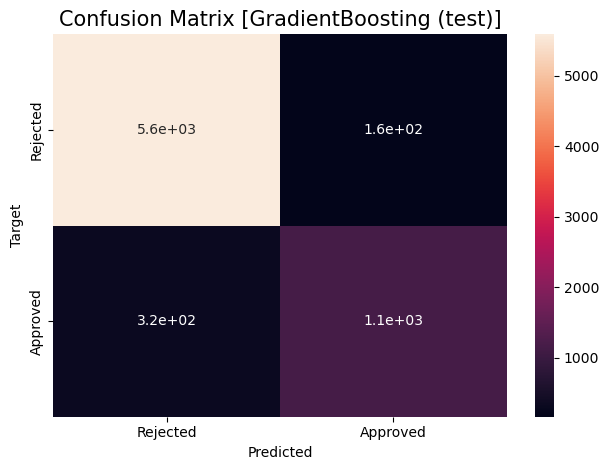

In [48]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, test_preds_gradboost, labels=gradboost_model.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix [GradientBoosting (test)]', fontsize=15)
ax.xaxis.set_ticklabels(['Rejected', 'Approved']) 
ax.yaxis.set_ticklabels(['Rejected', 'Approved']) 
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

**Random Forest Classifier**

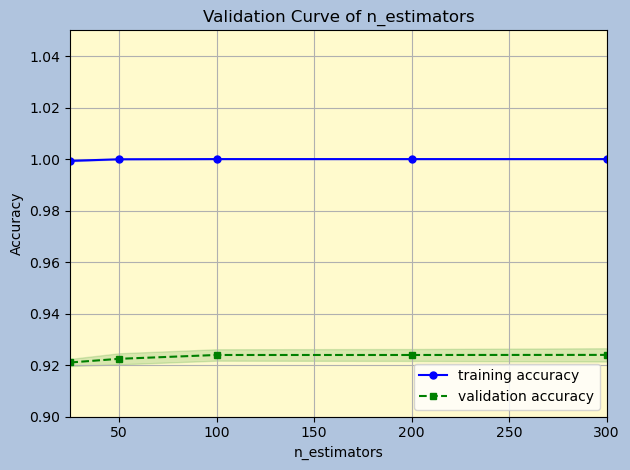

In [49]:
rf_class = RandomForestClassifier(random_state=42)

plot_validation_curve(rf_class, X_train, y_train, 4, 'n_estimators', [25,50,100,200,300], y_lim=[0.9,1.05])

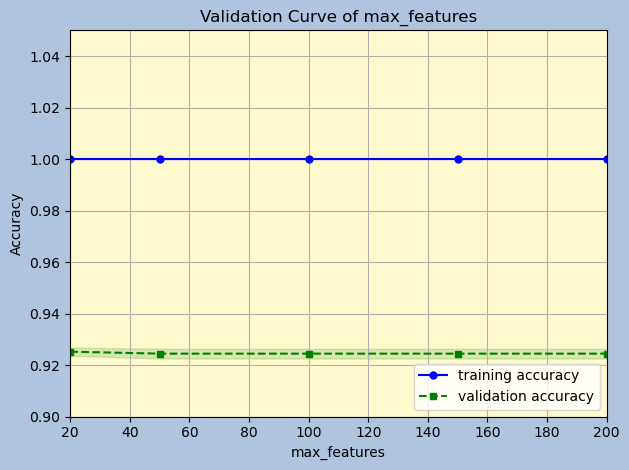

In [50]:
plot_validation_curve(rf_class, X_train, y_train, 4, 'max_features', [20,50,100,150,200], y_lim=[0.9,1.05])

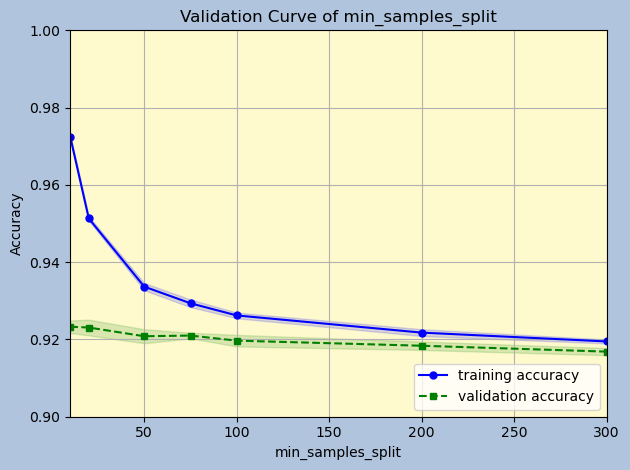

In [51]:
plot_validation_curve(rf_class, X_train, y_train, 4, 'min_samples_split', [10,20,50,75,100,200,300], y_lim=[0.9,1.])

In [52]:
def rf_objective(trial, X, y, cv, scoring):
    """
      An objective function to tune hyperparameters of Gradient Boosting Classifier.
      Args:
        trial: an Optuna trial
        X: DataFrame object, features
        y: Series object, Labels
        cv: k folds to cross-validate
        scoring: String, evaluation metric
      Return:
        Mean test accuracy
      """

    params = {
        #"n_estimators": trial.suggest_int("n_estimators", 100, 300, step=50),
        #"max_features": trial.suggest_int("max_features", 50, 200, step=50),
        "min_samples_split": trial.suggest_int("min_samples_split", 20, 80, step=5),
        "random_state": 42,
        }
    
    # Perform cross validation
    rf_class = RandomForestClassifier(**params)

    # Compute scores
    scores = cross_validate(rf_class, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    accuracy = scores["test_score"].mean()
    
    return accuracy


rf_study = optuna.create_study(direction = "maximize")

func = lambda trial: rf_objective(trial, X_train, y_train, cv=kf, scoring="accuracy")

# Start optimizing with 20 trials
rf_study.optimize(func, n_trials=20)

print(f"The highest accuracy reached by this study: {(rf_study.best_value)*100:.1f}%.")

print("Best params:")
for key, value in rf_study.best_params.items():
    print(f"\t{key}: {value}")

[I 2025-02-12 16:09:23,281] A new study created in memory with name: no-name-92620a33-4ffa-4d2c-a7cb-e3941f54f12b
[I 2025-02-12 16:09:28,792] Trial 0 finished with value: 0.9212533954058826 and parameters: {'min_samples_split': 65}. Best is trial 0 with value: 0.9212533954058826.
[I 2025-02-12 16:09:33,238] Trial 1 finished with value: 0.9221891685163403 and parameters: {'min_samples_split': 25}. Best is trial 1 with value: 0.9221891685163403.
[I 2025-02-12 16:09:38,779] Trial 2 finished with value: 0.9210800611555957 and parameters: {'min_samples_split': 75}. Best is trial 1 with value: 0.9221891685163403.
[I 2025-02-12 16:09:44,573] Trial 3 finished with value: 0.9211494272894383 and parameters: {'min_samples_split': 55}. Best is trial 1 with value: 0.9221891685163403.
[I 2025-02-12 16:09:50,490] Trial 4 finished with value: 0.9221198924761861 and parameters: {'min_samples_split': 45}. Best is trial 1 with value: 0.9221891685163403.
[I 2025-02-12 16:09:56,098] Trial 5 finished with v

The highest accuracy reached by this study: 92.4%.
Best params:
	min_samples_split: 20


In [53]:
params = rf_study.best_params

rf_model = RandomForestClassifier(**params)

rf_model.fit(X_train, y_train)

test_preds_rf = rf_model.predict(X_test)

rf_test_results = get_test_scores('RandomForest + Optuna', test_preds_rf, y_test)

rf_test_results

,model,precision,recall,F1,accuracy
0,RandomForest + Optuna,0.913056,0.852232,0.878154,0.926937


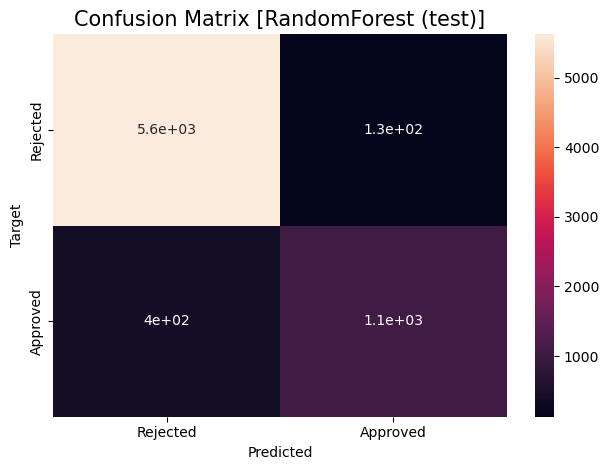

In [54]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, test_preds_rf, labels=rf_model.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix [RandomForest (test)]', fontsize=15)
ax.xaxis.set_ticklabels(['Rejected', 'Approved']) 
ax.yaxis.set_ticklabels(['Rejected', 'Approved']) 
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

**XGBoost Classifier**

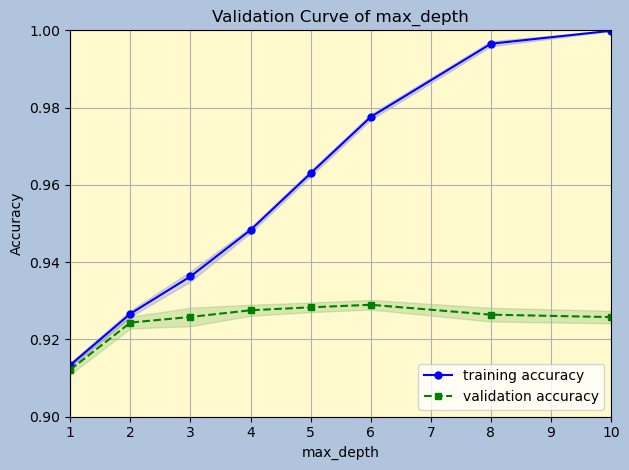

In [55]:
xgb = XGBClassifier(random_state=42)

plot_validation_curve(xgb, X_train, y_train, 4, 'max_depth', [1,2,3,4,5,6,8,10], y_lim=[0.9,1.])

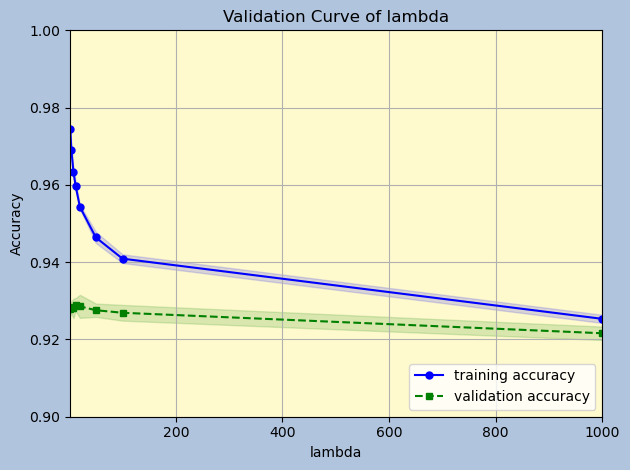

In [56]:
plot_validation_curve(xgb, X_train, y_train, 4, 'lambda', [2,4,8,12,20,50,100,1000], y_lim=[0.9,1.])

In [57]:
def xgb_objective(trial, X, y, cv, scoring):
    """
      An objective function to tune hyperparameters of Gradient Boosting Classifier.
      Args:
        trial: an Optuna trial
        X: DataFrame object, features
        y: Series object, Labels
        cv: k folds to cross-validate
        scoring: String, evaluation metric
      Return:
        Mean test accuracy
      """

    params = {
        "max_depth": trial.suggest_int("max_depth", 2, 6),
        "lambda": trial.suggest_int("lambda", 20, 100, step=10),
        "random_state": 42,
        }
    
    # Perform cross validation
    xgb_class = XGBClassifier(**params)

    # Compute scores
    scores = cross_validate(xgb_class, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    accuracy = scores["test_score"].mean()
    
    return accuracy


xgb_study = optuna.create_study(direction = "maximize")

func = lambda trial: xgb_objective(trial, X_train, y_train, cv=kf, scoring="accuracy")

# Start optimizing with 20 trials
xgb_study.optimize(func, n_trials=20)

print(f"The highest accuracy reached by this study: {(xgb_study.best_value)*100:.1f}%.")

print("Best params:")
for key, value in xgb_study.best_params.items():
    print(f"\t{key}: {value}")

[I 2025-02-12 16:12:00,716] A new study created in memory with name: no-name-e8c3f4ef-7240-40db-8c76-9da2ed40bd56
[I 2025-02-12 16:12:01,869] Trial 0 finished with value: 0.9270761985388607 and parameters: {'max_depth': 4, 'lambda': 30}. Best is trial 0 with value: 0.9270761985388607.
[I 2025-02-12 16:12:02,839] Trial 1 finished with value: 0.9195204793464724 and parameters: {'max_depth': 2, 'lambda': 60}. Best is trial 0 with value: 0.9270761985388607.
[I 2025-02-12 16:12:03,761] Trial 2 finished with value: 0.9217040019916711 and parameters: {'max_depth': 2, 'lambda': 30}. Best is trial 0 with value: 0.9270761985388607.
[I 2025-02-12 16:12:05,076] Trial 3 finished with value: 0.9280465556131821 and parameters: {'max_depth': 6, 'lambda': 40}. Best is trial 3 with value: 0.9280465556131821.
[I 2025-02-12 16:12:05,950] Trial 4 finished with value: 0.9200403319411855 and parameters: {'max_depth': 2, 'lambda': 70}. Best is trial 3 with value: 0.9280465556131821.
[I 2025-02-12 16:12:06,867

The highest accuracy reached by this study: 92.9%.
Best params:
	max_depth: 6
	lambda: 50


In [58]:
params = xgb_study.best_params

xgb_model = XGBClassifier(**params)

xgb_model.fit(X_train, y_train)

test_preds_xgb = xgb_model.predict(X_test)

xgb_test_results = get_test_scores('XGBoost + Optuna', test_preds_xgb, y_test)

xgb_test_results

,model,precision,recall,F1,accuracy
0,XGBoost + Optuna,0.906387,0.868107,0.885435,0.929433


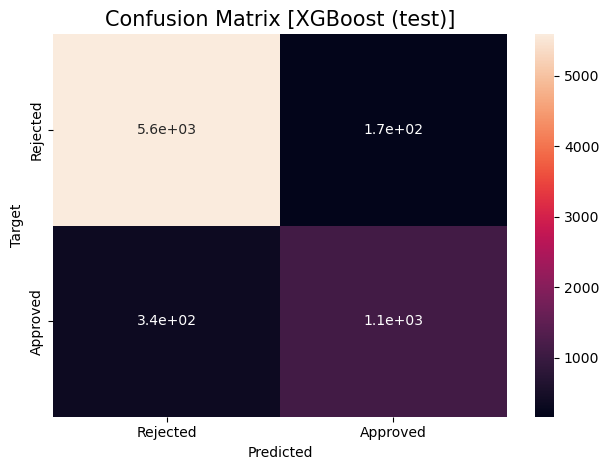

In [59]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, test_preds_xgb, labels=xgb_model.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix [XGBoost (test)]', fontsize=15)
ax.xaxis.set_ticklabels(['Rejected', 'Approved']) 
ax.yaxis.set_ticklabels(['Rejected', 'Approved']) 
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

# 5. Ensemble Learning
<a id="5"></a>

## 5.1 Ensemble with a Voting Classifier

In [60]:
svc_model = SVC(random_state=42, probability=True)

svc_model.fit(X_train, y_train)

test_preds_svc = svc_model.predict(X_test)

svc_test_results = get_test_scores('SVC Classifier', test_preds_svc, y_test)

svc_test_results

,model,precision,recall,F1,accuracy
0,SVC Classifier,0.882858,0.844246,0.861562,0.915015


In [61]:
voting_classifier = VotingClassifier(estimators=[
        ('XGB', xgb_model),
        ('SVC', svc_model),
        ('GradBoost', gradboost_model)
    ], voting='soft', verbose=False)

voting_classifier.fit(X_train, y_train)

test_preds_vote = voting_classifier.predict(X_test)

vote_test_results = get_test_scores('Voting Classifier', test_preds_vote, y_test)

vote_test_results

,model,precision,recall,F1,accuracy
0,Voting Classifier,0.908962,0.866579,0.885566,0.929849


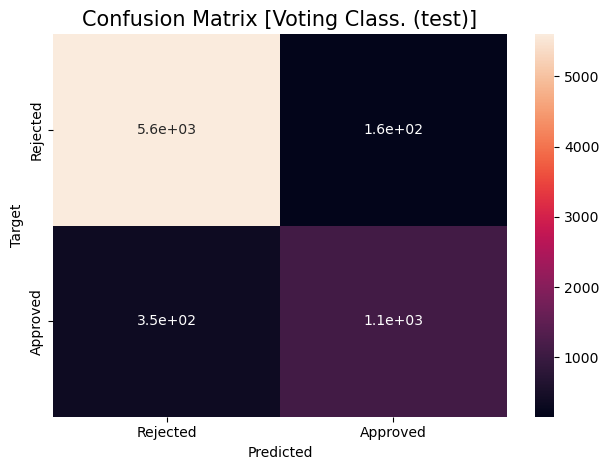

In [62]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, test_preds_vote, labels=voting_classifier.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix [Voting Class. (test)]', fontsize=15)
ax.xaxis.set_ticklabels(['Rejected', 'Approved']) 
ax.yaxis.set_ticklabels(['Rejected', 'Approved']) 
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

## 5.2 Ensemble with a Stacking Classifier

In [ ]:
stacking_clf = StackingClassifier(
    estimators=[
        ('XGB', xgb_model),
        ('SVC', svc_model),
        ('GradBoost', gradboost_model)
    ],
    final_estimator=rf_model,
    cv=kf
)

stacking_clf.fit(X_train, y_train)

test_preds_stack = stacking_clf.predict(X_test)

stack_test_results = get_test_scores('Stacking Classifier', test_preds_stack, y_test)

stack_test_results

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, test_preds_stack, labels=stacking_clf.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix [Stacking Class. (test)]', fontsize=15)
ax.xaxis.set_ticklabels(['Rejected', 'Approved']) 
ax.yaxis.set_ticklabels(['Rejected', 'Approved']) 
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

## 5.3 Ensemble Learning with Optuna

I am using an ensemble model, where the weights of the estimators are optimized by using Optuna.

In [ ]:
estimators = [
        ('XGB', xgb_model),
        ('SVC', svc_model),
        ('GradBoost', gradboost_model),
        ('RF', rf_model)
    ]


def ensemble_objective(trial, X, y, cv, scoring):
    
    params = {
        'xgboost_weight': trial.suggest_float('xgboost_weight', 0.0, 1.0),
        'svc_weight': trial.suggest_float('svc_weight', 0.0, 1.0),
        'gradboost_weight': trial.suggest_float('gradboost_weight', 0.0, 1.0),
        'rf_weight': trial.suggest_float('rf_weight', 0.0, 1.0)
    }
    
    scores = []
        
    voting_class = VotingClassifier(
        estimators = estimators,
        weights = [params['xgboost_weight'], params['svc_weight'], params['gradboost_weight'], params['rf_weight']]
    )

    # Compute scores
    scores = cross_validate(voting_class, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    accuracy = scores["test_score"].mean()
        
    return accuracy


ensemble_study = optuna.create_study(direction="maximize")

func = lambda trial: ensemble_objective(trial, X_train, y_train, cv=kf, scoring="accuracy")

# Start optimizing with 20 trials
ensemble_study.optimize(func, n_trials=20)

print(f"The highest accuracy reached by this study: {(ensemble_study.best_value)*100:.1f}%.")

print("Best params:")
for key, value in ensemble_study.best_params.items():
    print(f"\t{key}: {value}")

The ensemble model accuracy might be improved by increasing the number of trials from 20 to 50 or 100.

In [ ]:
params = ensemble_study.best_params

val_weigths = list(params.values())

val_weigths

In [ ]:
clf_votesoft_final = VotingClassifier(
    estimators = [('XGB', xgb_model),
                ('SVC', svc_model),
                ('GradBoost', gradboost_model),
                ('RF', rf_model)],
    weights = val_weigths)

clf_votesoft_final.fit(X_train, y_train)

test_preds_votesoft = clf_votesoft_final.predict(X_test)

votesoft_results = get_test_scores('EnsembleVoting + Optuna', test_preds_votesoft, y_test)

votesoft_results

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, test_preds_votesoft, labels=clf_votesoft_final.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix [Stacking Class. (test)]', fontsize=15)
ax.xaxis.set_ticklabels(['Rejected', 'Approved']) 
ax.yaxis.set_ticklabels(['Rejected', 'Approved']) 
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

In [ ]:
final_test_results = (pd.concat([gradboost_test_results, 
                                 rf_test_results, 
                                 xgb_test_results, 
                                 vote_test_results,
                                 stack_test_results,
                                 votesoft_results], axis=0).sort_values('accuracy', ascending=False))

final_test_results